# Data Preparation

### Importing Modules

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading data

In [47]:
file = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(file)

In [48]:
df = df.drop(columns=['num_cylinders', 'origin', 'acceleration', 'fuel_type', 'drivetrain', 'num_doors'])

In [49]:
df.head(10)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
5,190,NaN,2484.883986,2008,17.271818
6,240,127.0,3006.542287,2012,13.210412
7,150,239.0,3638.657780,2020,12.848884
8,250,174.0,2714.219310,2016,16.823554
9,150,123.0,3509.036569,2005,12.298355


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


## Exploratory Data Analysis

In [51]:
for col in df.columns:
  print(f'{col}: {df[col].unique()[:5]}')
  print(df[col].nunique())
  print()

engine_displacement: [170 130 220 210 190]
36

horsepower: [159.  97.  78.  nan 140.]
192

vehicle_weight: [3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year: [2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg: [13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

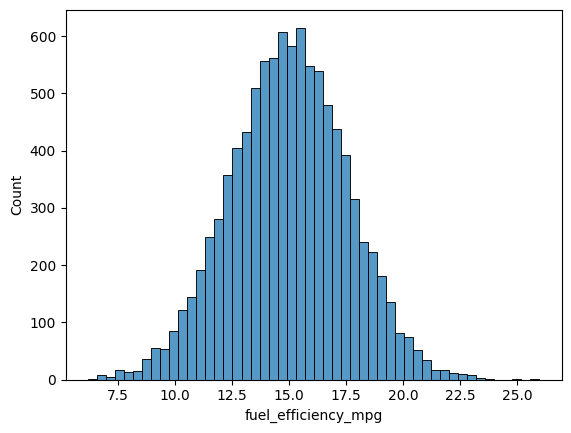

In [52]:
sns.histplot(df['fuel_efficiency_mpg'], bins = 50)

In [53]:
mpg_logs = np.log1p(df['fuel_efficiency_mpg'])

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

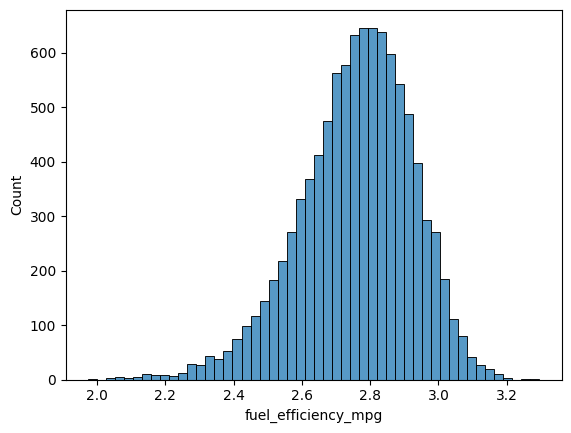

In [54]:
sns.histplot(mpg_logs, bins = 50)

Directly plotting gives more of a normal distribution plot than the log plot

### Missing values

In [55]:
df.columns[df.isnull().any()]

Index(['horsepower'], dtype='object')

In [56]:
df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [57]:
df['horsepower'].median()

149.0

In [58]:
df = df.fillna(0)

# Modeling

### Splitting the data

In [59]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [60]:
df_train, df_temp = train_test_split(df_shuffled, test_size=0.4, random_state=42)

In [61]:
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

In [62]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [63]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,120,98.0,2152.640871,2008,18.830833
1,190,140.0,2905.379446,2019,14.829684
2,170,96.0,3782.290474,2014,10.316109
3,240,137.0,3640.501744,2007,12.173032
4,240,182.0,3003.041960,2022,15.141689


In [64]:
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,190,186.0,2955.506105,2021,14.370227
1,210,120.0,3709.433973,2013,9.945553
2,160,154.0,2876.536456,2018,15.719309
3,220,181.0,3280.190782,2012,13.960268
4,230,175.0,2626.784941,2003,17.302281


In [65]:
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,181.0,2563.027777,2014,17.411819
1,170,0.0,3258.493827,2004,14.245590
2,140,120.0,2059.906745,2022,19.820801
3,170,215.0,2702.545113,2016,17.277785
4,210,137.0,3417.292228,2016,12.757799


In [66]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [67]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Training

In [68]:
def prepare_X(df1):
  X = df1.values
  return X

In [69]:
X_train = prepare_X(df_train)

In [70]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0], w_full[1:]

In [71]:
w0, w = train_linear_regression(X_train, y_train)

In [72]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

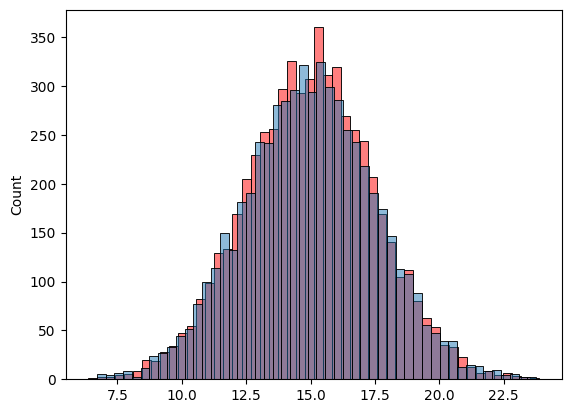

In [73]:
sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red')
sns.histplot(y_train, alpha = 0.5, bins = 50)

### Evaluating: RMSE

In [94]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [75]:
rmse(y_train, y_pred)

np.float64(0.52)

### Validation

In [76]:
X_val = prepare_X(df_val)
w0, w = train_linear_regression(X_val, y_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.51)

### Testing

In [77]:
X_test = prepare_X(df_test)
w0, w = train_linear_regression(X_test, y_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.51)

## Retraining and modeling, but with fillna as mean instead of 0

In [78]:
df1 = df.fillna(df['horsepower'].median())

Preparing the new data as a copy:

In [79]:
df1_shuffled = df1.sample(frac=1, random_state=42).reset_index(drop=True)
df1_train, df1_temp = train_test_split(df1_shuffled, test_size=0.4, random_state=42)
df1_val, df1_test = train_test_split(df1_temp, test_size=0.5, random_state=42)
df1_train = df1_train.reset_index(drop=True)
df1_val = df1_val.reset_index(drop=True)
df1_test = df1_test.reset_index(drop=True)

In [80]:
y1_train = df1_train.fuel_efficiency_mpg.values
y1_val = df1_val.fuel_efficiency_mpg.values
y1_test = df1_test.fuel_efficiency_mpg.values

In [81]:
del df1_train['fuel_efficiency_mpg']
del df1_val['fuel_efficiency_mpg']
del df1_test['fuel_efficiency_mpg']

Training:

In [82]:
X1_train = prepare_X(df1_train)
w0, w = train_linear_regression(X1_train, y1_train)
y1_pred = w0 + X1_train.dot(w)
rmse(y1_train, y1_pred)

np.float64(0.52)

Validating:

In [83]:
X1_val = prepare_X(df1_val)
w0, w = train_linear_regression(X1_val, y1_val)
y1_pred = w0 + X1_val.dot(w)
rmse(y1_val, y1_pred)

np.float64(0.51)

Testing:

In [84]:
X1_test = prepare_X(df1_test)
w0, w = train_linear_regression(X1_test, y1_test)
y1_pred = w0 + X1_test.dot(w)
rmse(y1_test, y1_pred)

np.float64(0.51)

## Regularization

In [85]:
def train_linear_regression_reg(X, y, r):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX = XTX + (r * np.eye(XTX.shape[0]))
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0], w_full[1:]

Training:

In [98]:
X1_train = prepare_X(df1_train)
reg = [0, 0.01, 0.1, 1, 5, 10, 100]
for r in reg:
  w0, w = train_linear_regression_reg(X1_train, y1_train, r)
  y1_pred = w0 + X1_train.dot(w)
  print(f"\n RMSE for r = {r} is : {round(rmse(y1_train, y1_pred), 3)}")


 RMSE for r = 0 is : 0.523

 RMSE for r = 0.01 is : 0.523

 RMSE for r = 0.1 is : 0.526

 RMSE for r = 1 is : 0.531

 RMSE for r = 5 is : 0.531

 RMSE for r = 10 is : 0.531

 RMSE for r = 100 is : 0.532


Validating:

In [99]:
X1_val = prepare_X(df1_val)
for r in reg:
  w0, w = train_linear_regression_reg(X1_val, y1_val, r)
  y1_pred = w0 + X1_val.dot(w)
  print(f"\n RMSE for r = {r} is : {round(rmse(y1_val, y1_pred), 3)}")


 RMSE for r = 0 is : 0.509

 RMSE for r = 0.01 is : 0.51

 RMSE for r = 0.1 is : 0.515

 RMSE for r = 1 is : 0.517

 RMSE for r = 5 is : 0.518

 RMSE for r = 10 is : 0.518

 RMSE for r = 100 is : 0.518


Testing:

In [100]:
X1_test = prepare_X(df1_test)
for r in reg:
  w0, w = train_linear_regression_reg(X1_test, y1_test, r)
  y1_pred = w0 + X1_test.dot(w)
  print(f"\n RMSE for r = {r} is : {round(rmse(y1_test, y1_pred), 3)}")


 RMSE for r = 0 is : 0.515

 RMSE for r = 0.01 is : 0.515

 RMSE for r = 0.1 is : 0.519

 RMSE for r = 1 is : 0.52

 RMSE for r = 5 is : 0.52

 RMSE for r = 10 is : 0.52

 RMSE for r = 100 is : 0.52


## Trying different seeds for data split

In [103]:
rmse_array = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
  df_train, df_temp = train_test_split(df_shuffled, test_size=0.4, random_state=seed)
  df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)

  df_val = df_val.reset_index(drop=True)

  y_val = df_val.fuel_efficiency_mpg.values

  del df_val['fuel_efficiency_mpg']

  X_val = prepare_X(df_val)
  w0, w = train_linear_regression(X_val, y_val)
  y_pred = w0 + X_val.dot(w)
  error = rmse(y_val, y_pred)
  print(f"RMSE for seed = {seed} is : {round(error, 3)}")
  rmse_array.append(error)
print(np.std(rmse_array))

RMSE for seed = 0 is : 0.517
RMSE for seed = 1 is : 0.509
RMSE for seed = 2 is : 0.514
RMSE for seed = 3 is : 0.513
RMSE for seed = 4 is : 0.518
RMSE for seed = 5 is : 0.522
RMSE for seed = 6 is : 0.512
RMSE for seed = 7 is : 0.524
RMSE for seed = 8 is : 0.507
RMSE for seed = 9 is : 0.528
0.006561934167573809


## Final testing

Where `seed = 9` and `r = 0.001`

In [114]:
df2 = df.fillna(0)
seed = 9
r = 0.001

In [113]:
df2_shuffled = df2.sample(frac=1, random_state=seed).reset_index(drop=True)
df2_train, df2_test = train_test_split(df_shuffled, test_size=0.2, random_state=seed)

df2_test = df2_test.reset_index(drop=True)
y2_test = df2_test.fuel_efficiency_mpg.values
del df2_test['fuel_efficiency_mpg']

X2_test = prepare_X(df2_test)
w0, w = train_linear_regression_reg(X2_test, y2_test, r)
y2_pred = w0 + X2_test.dot(w)
error = rmse(y1_test, y1_pred)
print(f"RMSE for test dataset is : {round(error, 2)}")

RMSE for test dataset is : 0.52
